# Logistic Regression Assignment

- Run the below cells. If you have the data in a different directory, you'll need to change the url.
- Complete all of the numbered questions. You may call any packages that we've used in class.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/log_reg/employee-turnover-balanced.csv')
df.head()

,left_company,age,frequency_of_travel,department,commuting_distance,education,satisfaction_with_environment,gender,seniority_level,position,satisfaction_with_job,married_or_single,last_raise_pct,last_performance_rating,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
0,No,37,Travel_Rarely,Sales,16,4,4,Male,2,Sales Executive,3,Divorced,19,3,9,1,0,0,0
1,No,39,Travel_Rarely,Research & Development,3,2,3,Male,2,Laboratory Technician,3,Divorced,15,3,11,10,8,0,7
2,No,52,Travel_Frequently,Research & Development,25,4,3,Female,4,Manufacturing Director,4,Married,22,4,31,9,8,0,0
3,No,50,Non-Travel,Sales,1,3,4,Female,2,Sales Executive,3,Married,12,3,19,18,7,0,13
4,No,44,Travel_Rarely,Research & Development,4,3,4,Male,2,Healthcare Representative,2,Single,12,3,10,5,2,2,3


## Data Definitions
- `left_company`: Whether individual left the company or not. This is the target variable.  
- `age`: Age of individual. 
- `frequency_of_travel`: How often person travels for work.  
- `department`: Department person works(worked).  
- `commuting_distance`: Distance person lives from office.  
- `education`: Highest education category.  
- `satisfaction_with_environment`: Satisfaction of environment, on lickert scale.  
- `gender`: Gender of individual.  
- `seniority_level`: Seniority level of individual.  
- `position`: Last position held at the company.  
- `satisfaction_with_job`: Satisfaction of their job, on lickert scale.  
- `married_or_single`: Marital status of person.  
- `last_raise_pct`: Percent increase their last raise represented.  
- `last_performance_rating`: Most recent annual performance rating, on lickert scale.  
- `total_years_working`: Number of years the individual has spent working in their career.  
- `years_at_company`: Number of years the individual has been at the company, regardless of position.  
- `years_in_current_job`: Number of years the individual has been in their current position.  
- `years_since_last_promotion`: Years since the person had their last promotion.  
- `years_with_current_supervisor`: Years the person has had their current supervisor.

# Question 1
- What is the distribution of the target (`left_company`)?  
- Do you have any concerns on class imbalances?

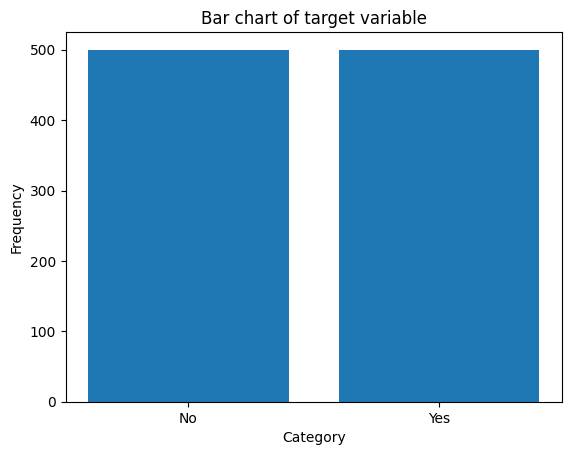

In [2]:
# insert code
target = df["left_company"]

frequency = target.value_counts()

plt.bar(frequency.index, frequency.values)
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.title("Bar chart of target variable")
plt.show()


There is no imbalance

# Question 2
- Create and print a list of the variables that you would treat as numerical and another list for the variables that you would treat as categorical.  
- Explain your choices.

In [3]:
numerical_variable = []
categorical_Variable = []

for column in df.columns[1:]:
    if df[column].dtype == "int64" or df[column].dtype == "float64":
        numerical_variable.append(column)
    else:
        categorical_Variable.append(column)

print("Numerical Features", numerical_variable)
print("\nCategorical Features", categorical_Variable)

Numerical Features ['age', 'commuting_distance', 'education', 'satisfaction_with_environment', 'seniority_level', 'satisfaction_with_job', 'last_raise_pct', 'last_performance_rating', 'total_years_working', 'years_at_company', 'years_in_current_job', 'years_since_last_promotion', 'years_with_current_supervisor']

Categorical Features ['frequency_of_travel', 'department', 'gender', 'position', 'married_or_single']


In [4]:
df

,left_company,age,frequency_of_travel,department,commuting_distance,education,satisfaction_with_environment,gender,seniority_level,position,satisfaction_with_job,married_or_single,last_raise_pct,last_performance_rating,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
0,No,37,Travel_Rarely,Sales,16,4,4,Male,2,Sales Executive,3,Divorced,19,3,9,1,0,0,0
1,No,39,Travel_Rarely,Research & Development,3,2,3,Male,2,Laboratory Technician,3,Divorced,15,3,11,10,8,0,7
2,No,52,Travel_Frequently,Research & Development,25,4,3,Female,4,Manufacturing Director,4,Married,22,4,31,9,8,0,0
3,No,50,Non-Travel,Sales,1,3,4,Female,2,Sales Executive,3,Married,12,3,19,18,7,0,13
4,No,44,Travel_Rarely,Research & Development,4,3,4,Male,2,Healthcare Representative,2,Single,12,3,10,5,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Yes,39,Travel_Rarely,Sales,3,2,4,Female,2,Sales Executive,3,Married,18,3,12,1,0,0,0
996,Yes,26,Travel_Rarely,Sales,4,4,4,Male,2,Sales Executive,4,Single,12,3,8,8,7,7,4
997,Yes,18,Travel_Frequently,Sales,5,3,2,Male,1,Sales Representative,2,Single,14,3,0,0,0,0,0
998,Yes,28,Travel_Rarely,Research & Development,2,4,1,Male,1,Research Scientist,4,Married,13,3,5,3,2,2,2


Those variable who has int or float as data type are taken as numerical variables and the remaining are categorical variables

# Question 3
- Determine if any numerical variables risk multicolinearity.  
- Remove those variables (if any) from your numerical_vars list.  
- Why did you or did not remove any?

<AxesSubplot: >

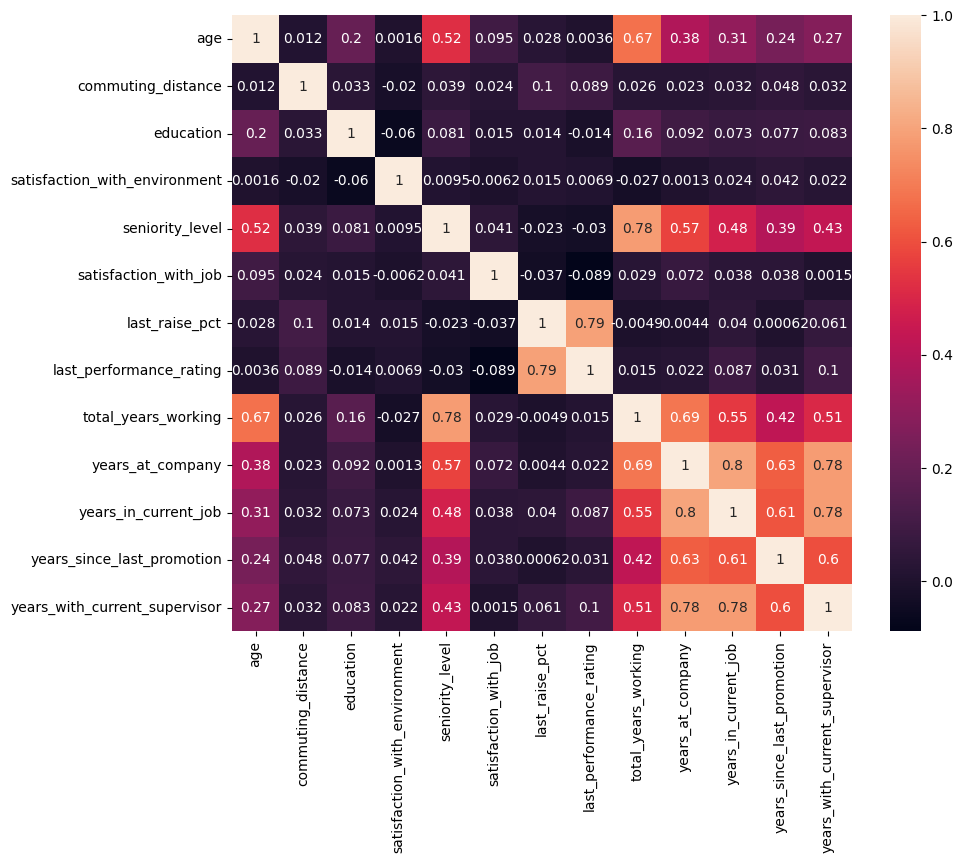

In [5]:
import pandas as pd
import seaborn as sns

numerical_variables = df.select_dtypes(include=["float64", "int64"])

corr_matrix = numerical_variables.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True)



If there are any variables that have a correlation coefficient close to 1 or -1, it may indicate that those variables risk multicollinearity.In this case we cannot see variables are highly correlated with each other so we are dropping any columns.

# Question 4
- Split the data into training and test sets.  
- Use 20% of the data for test and a random state of 124.  

In [6]:
from sklearn.model_selection import train_test_split

# insert code here
features = [x for x in df.columns if x != 'left_company']

X = df[features]
y = df['left_company']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=124)

print(f'Records in training data: {X_train.shape[0]:,}')
print(f'Records in test data: {X_test.shape[0]:,}')
print('\nFeatures:')
print(*X_train.columns, sep='\n')

Records in training data: 800
Records in test data: 200

Features:
age
frequency_of_travel
department
commuting_distance
education
satisfaction_with_environment
gender
seniority_level
position
satisfaction_with_job
married_or_single
last_raise_pct
last_performance_rating
total_years_working
years_at_company
years_in_current_job
years_since_last_promotion
years_with_current_supervisor


# Question 5
- Create a pipeline to process the numerical data.  
- Create a pipeline to process the categorical data.  

Verify each pipeline contains the columns you would expect using a fit_transform on the training data, i.e., print the shapes of the fit_transforms for each pipeline.

In [7]:
# insert code here

import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

numerical_pipeline = Pipeline([
    ('impute_missing_numerical', SimpleImputer(strategy='median')),
    ('standardize_numerical', StandardScaler())
])


from sklearn.preprocessing import OneHotEncoder

categorical_pipeline = Pipeline([
    ('impute_missing_categorical', SimpleImputer(strategy='most_frequent')), # Replace missing values with the most frequent
    ('encoder_categorical', OneHotEncoder(handle_unknown='ignore', drop='first')) # One-hot encode the categories
])

from sklearn.compose import ColumnTransformer

# insert code here
processing_pipeline = ColumnTransformer(transformers=[('process_numeric', numerical_pipeline, numerical_variable),
                                                      ('process_categorical', categorical_pipeline, categorical_Variable)])

processing_pipeline.fit(X_train)

processed_df = processing_pipeline.fit_transform(df)

print("Missing values: ", format(pd.DataFrame(processed_df).isnull().sum().sum())) # check for missing values 

Missing values:  0


# Question 6
- Create a pipeline that combines the pre-processing and implements a logistic regression model.  
- Print the accuracy on the training set and the test set.
- Do you have any concerns of overfitting based on the differences between the two accuracy scores?

In [8]:
from sklearn.linear_model import LogisticRegression
modeling_pipeline = Pipeline([('data_preprocessing', processing_pipeline),
                             ('Model', LogisticRegression())])

modeling_pipeline.fit(X_train, y_train)


Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('process_numeric',
                                                  Pipeline(steps=[('impute_missing_numerical',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_numerical',
                                                                   StandardScaler())]),
                                                  ['age', 'commuting_distance',
                                                   'education',
                                                   'satisfaction_with_environment',
                                                   'seniority_level',
                                                   'satisfaction_with_job',
                                                   'last_raise_pct',
                                                   'last_p...
                                                   'years_since_last_promotion',
                                                   'years_with_current_supervisor']),
                                                 ('process_categorical',
                                                  Pipeline(steps=[('impute_missing_categorical',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder_categorical',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['frequency_of_travel',
                                                   'department', 'gender',
                                                   'position',
                                                   'married_or_single'])])),
                ('Model', LogisticRegression())])

## Training set prediction

In [9]:
from sklearn.metrics import accuracy_score

preds = modeling_pipeline.predict(X_train)
print('Accuracy:')
accuracy_score(preds, y_train)

Accuracy:


0.73375

# testing set prediction

In [10]:
preds = modeling_pipeline.predict(X_test)
print('Accuracy: ')
accuracy_score(preds, y_test)

Accuracy: 


0.66

**AS we can see that there is a big difference in accuracies. We can say that the model is overfitted.**

---
# Question 7
What would you recommend as potential next steps for continuing to develop and evaluate a model?

- we can do eda to find insights and use them in model building
- we can use model optimization techniques like cross validation, hyperparameter tuning.